In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, splrep, splev
# position 0..100, R, G, B
interpolation_points = np.array([
    [0, 0,   7, 100],
    [16, 32, 107, 203],
    [42, 237, 255, 255],
    [64, 255, 170,   0],
    [86, 0, 2, 0],
    [100, 0, 0, 0]])
points_count = interpolation_points.shape[0]


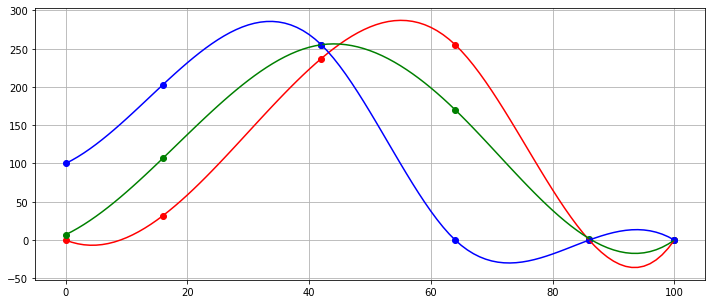

In [126]:
R = interp1d(interpolation_points[:,0], interpolation_points[:,1], kind='cubic')
G = interp1d(interpolation_points[:,0], interpolation_points[:,2], kind='cubic')
B = interp1d(interpolation_points[:,0], interpolation_points[:,3], kind='cubic')

iterations_range = np.arange(101)

plt.figure(figsize=(12,5))
plt.grid()
for c, p in zip(['r', 'g', 'b'], interpolation_points[:,1:].T):
    plt.plot(interpolation_points[:,0], p, c + 'o')
plt.plot(R(iterations_range), c='r')
plt.plot(G(iterations_range), c='g')
plt.plot(B(iterations_range), c='b')
plt.show()

In [142]:
# LUT
color_spectrum = np.stack([R(iterations_range), G(iterations_range), B(iterations_range)], axis=1)
color_spectrum = ((color_spectrum - np.min(color_spectrum)) / (np.max(color_spectrum)-np.min(color_spectrum))*255).astype(int)

print(color_spectrum[0,:])

[ 28  33 107]


In [171]:
# Fonction "LUT"
def LUT(x):
    if isinstance(x, int) or isinstance(x, float):
        return color_spectrum[x, :]
    else:
        output = np.zeros([*x.shape, 3], dtype=int)
        for di, d in enumerate(x):
            output[di] = color_spectrum[d.astype(int),:]
        return output

LUT(np.eye(3)*100)

array([[[ 28,  28,  28],
        [ 28,  33, 107],
        [ 28,  33, 107]],

       [[ 28,  33, 107],
        [ 28,  28,  28],
        [ 28,  33, 107]],

       [[ 28,  33, 107],
        [ 28,  33, 107],
        [ 28,  28,  28]]])

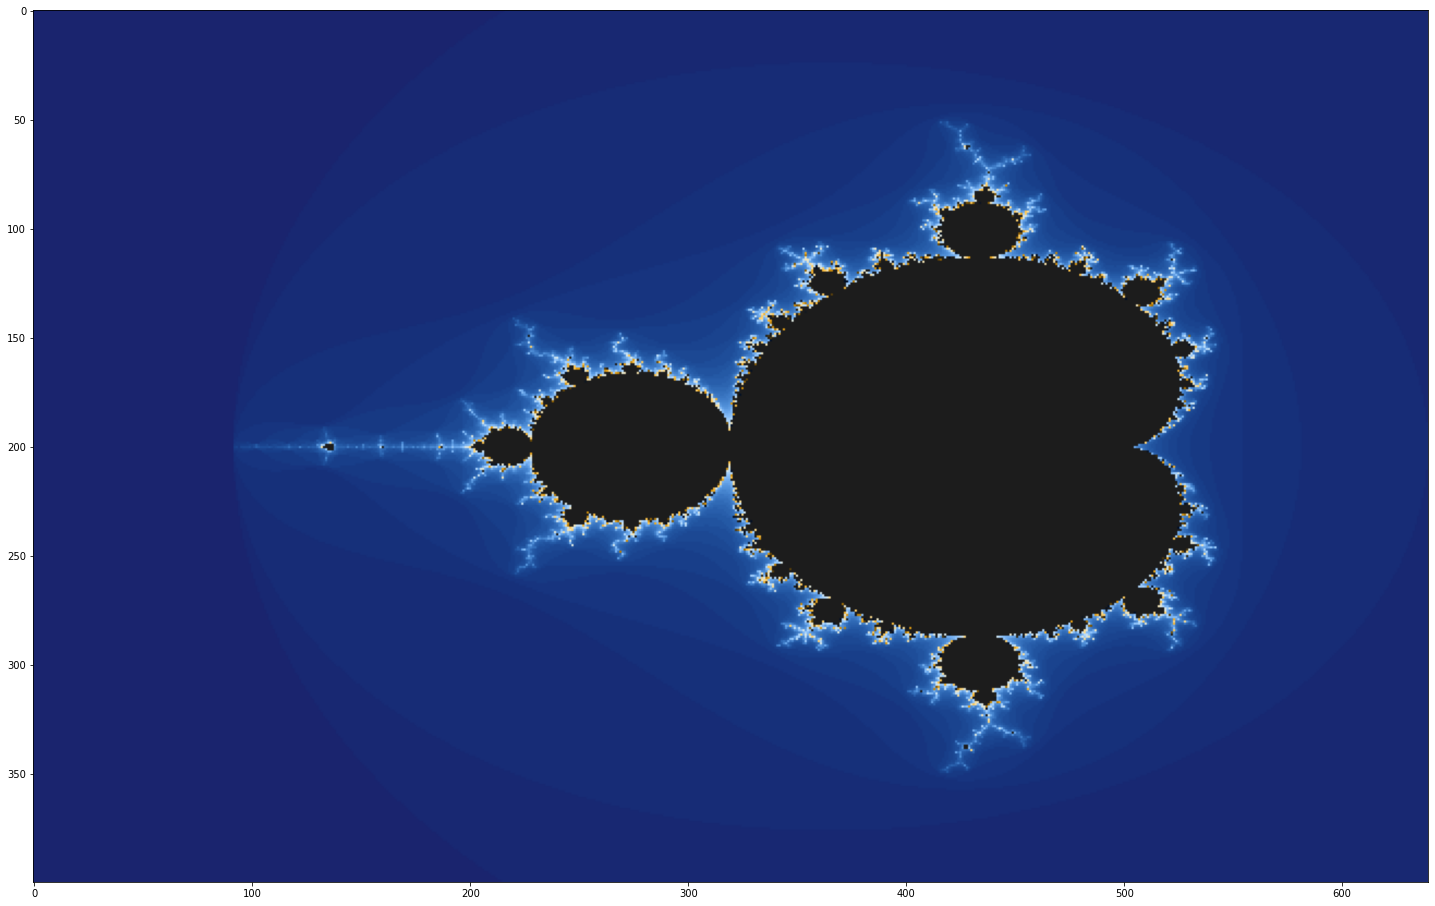

In [174]:
mandelbrot_iterations = np.load('../Tests/mandelbrot_iterations.npy', allow_pickle=True)

mandelbrot = LUT(mandelbrot_iterations)

plt.figure(figsize=(25,20))
plt.imshow(mandelbrot)
plt.show()